## Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy and  matplotlib) it becomes a powerful environment for scientific computing.

This section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

## Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Basic data types

#### Numbers

Integers and floats work as you would expect from other languages:

In [17]:
x = 3
print(x, type(x))

3 <class 'int'>


In [18]:
print(x + 1)   # Addition;
print(x - 1)   # Subtraction;
print(x * 2)   # Multiplication;
print(x ** 2)  # Exponentiation;

4
2
6
9


In [19]:
x += 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

4
8


In [20]:
y = 2.5
print(type(y)) # Prints "<class 'float'>"
print(y, y + 1, y * 2, y ** 2) # Prints "2.5 3.5 5.0 6.25"

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/2/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [21]:
t, f = True, False
print(type(t)) # Prints "<class 'bool'>"

<class 'bool'>


Now we let's look at the operations:

In [22]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


#### Strings

In [23]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter.
print(hello, len(hello))

hello 5


In [24]:
hw = hello + ' ' + world  # String concatenation
print(hw)  # prints "hello world"

hello world


In [25]:
hw12 = '%s %s %d' % (hello, world, 12)  # sprintf style string formatting
print(hw12)  # prints "hello world 12"

hello world 12


String objects have a bunch of useful methods; for example:

In [26]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                               # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/2/library/stdtypes.html#string-methods).

### Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

#### Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [27]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [28]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [29]:
xs.append('bar') # Add a new element to the end of the list
print(xs)  

[3, 1, 'foo', 'bar']


In [30]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs) 

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/2/tutorial/datastructures.html#more-on-lists).

#### Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [31]:
nums = range(5)     # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints "[0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints "[0, 1, 2, 3]"

range(0, 5)
range(2, 4)
range(2, 5)
range(0, 2)
range(0, 5)
range(0, 4)


#### Loops

You can loop over the elements of a list like this:

In [32]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [33]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [34]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [35]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [36]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [37]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [38]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [39]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [40]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [41]:
del(d['fish'])        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [1]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


If you want access to keys and their corresponding values, use the iteritems method:

In [2]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A %s has %d legs' % (animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [3]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [4]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


True
False


In [5]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [6]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))       
animals.remove('cat')    # Remove an element from a set
print(len(animals))       

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [7]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#%d: %s' % (idx + 1, animal))
# Prints "#1: fish", "#2: dog", "#3: cat"

#1: cat
#2: dog
#3: fish


Set comprehensions: like lists and dictionaries, we can easily construct sets using set comprehensions:

In [8]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [3]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [4]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

### Functions

Python functions are defined using the `def` keyword. For example:

In [11]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [12]:
def hello(name, loud=False):
    if loud:
        print('HELLO, %s' % name.upper())
    else:
        print('Hello, %s!' % name)

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


### Classes

The syntax for defining classes in Python is straightforward:

In [13]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, %s!' % self.name.upper())
        else:
            print('Hello, %s' % self.name)

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


### Exercises

Using list comprehension, create a list that contains only the odd numbers of the original list. You can do this with a single line of code.

In [1]:
even_odd = [5, 7, 11, 3, 2, 6, 1, 9, 8, 4, 10, 12]

odd = [x for x in even_odd if x % 2 != 0]
print(odd)

[5, 7, 11, 3, 1, 9]


Write a function that keeps only the unique numbers in the given list (that is, no number is repeated). Hint: the opposite of "in" is "not in".

In [13]:
rnd_list = [8, 9, 1, 3, 5, 2, 10, 6, 4, 7, 1, 8, 5, 3, 7, 2, 9, 6, 10, 4]

def unique_in_list(random_list):
    temp = []
    for x in rnd_list:
        if x not in temp:
            temp.append(x)
    return temp

unique = unique_in_list(rnd_list)
print(unique)

[8, 9, 1, 3, 5, 2, 10, 6, 4, 7]


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays.

To use Numpy, we first need to import the `numpy` package:

In [4]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [15]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [77]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [78]:
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [69]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [70]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [19]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [20]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [21]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.17049014 0.86536962]
 [0.74082229 0.07997651]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [22]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [23]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [24]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [25]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [26]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [27]:
a = np.array([[1,2], [3, 4], [5, 6]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]


In [28]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [29]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [30]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [31]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [1]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [33]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [34]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int32 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [35]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [36]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [37]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [38]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [39]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


We use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [40]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [41]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [42]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [43]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [44]:
print(x)
print(x.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [45]:
v = np.array([[1,2,3]])
print(v )
print(v.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

### Exercises

Create a random 5x5 matrix and normalize its values using the formula $$x = \frac{x - min}{max - min}$$ where $min$ and $max$ are the minimum and the maximum value of the matrix, respectively. Hint: for computing the max/min value of a matrix X use the function X.max()/X.min(). 

In [5]:
matrix =  np.random.randint(100000,size=(5,5))
print('Matrix before normalization\n', matrix)
m_max,m_min = matrix.max(),matrix.min()
norm_matrix = (matrix - m_min)/(m_max - m_min)
print('Matrix after normalization\n', norm_matrix)

Matrix before normalization
 [[42335 25186 26203 68661 39648]
 [18762 51989 67529 68858 12908]
 [ 5554 70165 75992 28038  7372]
 [35928 81179 84807 54365 51067]
 [59484 48699 63949 65759 80932]]
Matrix after normalization
 [[0.464096   0.24771302 0.26054534 0.7962727  0.43019192]
 [0.16665615 0.58590842 0.78198933 0.79875841 0.09279144]
 [0.         0.8152499  0.88877393 0.28369904 0.02293919]
 [0.38325363 0.95422255 1.         0.61588836 0.57427479]
 [0.68047897 0.5443958  0.73681753 0.75965579 0.95110595]]


Create a random 3x5 matrix and a random 2x3 matrix, compute the transpose of the two matrices and then compute the product between these new created matrices.

In [6]:
x = np.random.randint(10000,size=(3,5))
x_t = x.transpose()
print('First matrix\n', x_t)
y = np.random.randint(10000,size=(2,3))
y_t = y.transpose()
print('Second matrix\n', y_t)
z = np.dot(x_t,y_t)
print('Product\n', z)

First matrix
 [[1461 6493 4472]
 [2944 1398 4439]
 [6261 9038 2739]
 [7335 1716  582]
 [9036 2839 4824]]
Second matrix
 [[5935 3130]
 [3672 6119]
 [1885  308]]
Product
 [[40943051 45680973]
 [30973611 19136294]
 [75509586 75744064]
 [50931447 33638010]
 [73146708 47140313]]


## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module.

In [8]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [49]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

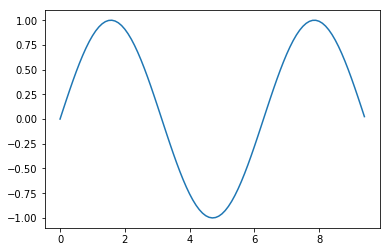

In [50]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

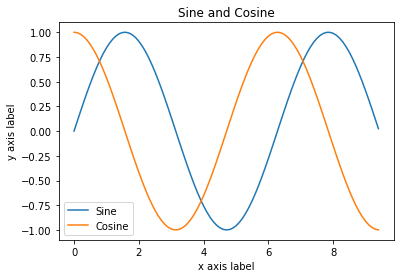

In [51]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

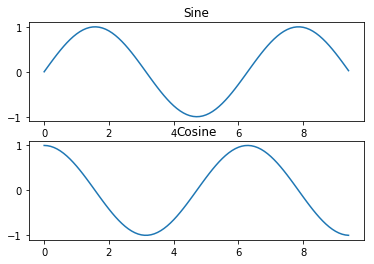

In [52]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### Exercises

Complete the code needed to generate random data and to plot and show a scatterplot.

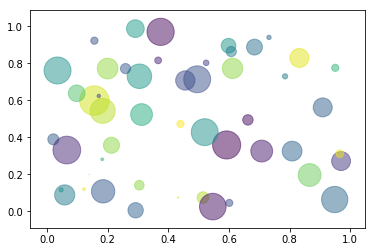

In [9]:
np.random.seed(42)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

plt.scatter(x,y, s=area, c=colors, alpha=0.5)
plt.show()

## Pandas

Pandas is a library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series in order to handle the vast majority of typical use cases in finance, statistics, social science and many other areas.

In [10]:
import pandas as pd

### Time series

In [37]:
s = pd.Series([1, 3, 5, 7, 9, 11])
print(s, type(s))

0     1
1     3
2     5
3     7
4     9
5    11
dtype: int64 <class 'pandas.core.series.Series'>


### DataFrame

In [38]:
df = pd.DataFrame(np.random.randn(6, 4), columns=list('ABCD'))
print(df, type(df))

          A         B         C         D
0 -0.032502 -0.165623  2.074768 -1.246601
1  0.334490  0.068217  0.667140  0.808945
2  0.708128  0.426766  1.346880 -0.434387
3 -1.177386  0.629772 -0.700673  0.599746
4  1.188775 -0.146932 -0.202735 -0.627930
5  0.608347  0.427066  0.475028  0.584905 <class 'pandas.core.frame.DataFrame'>


DataFrames can also be loaded from a .csv file (more extensions are also supported). As you can see, if no column is set as index, pandas creates an "extra" column as index.

In [39]:
df = pd.read_csv('BostonHousing.csv', sep=',', index_col=None)

print(df, type(df))

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12.5   7.8

### View data

The `head` and `tail` allow you to print the first and last rows of the DataFrame respectively. By default the first and the last five rows are shown, but this number can be defined by the user.

In [40]:
print(df.head())
print(df.tail())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794 

In [41]:
print(df.head(2))
print(df.tail(2))

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       b  lstat  medv  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6  
        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


A cool way to show DataFrames (but that works only in jupyter) involves using `display`.

In [42]:
display(df)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Selection

In [43]:
# Get the values of a single column
print(df['tax'])

0      296
1      242
2      242
3      222
4      222
5      222
6      311
7      311
8      311
9      311
10     311
11     311
12     311
13     307
14     307
15     307
16     307
17     307
18     307
19     307
20     307
21     307
22     307
23     307
24     307
25     307
26     307
27     307
28     307
29     307
      ... 
476    666
477    666
478    666
479    666
480    666
481    666
482    666
483    666
484    666
485    666
486    666
487    666
488    711
489    711
490    711
491    711
492    711
493    391
494    391
495    391
496    391
497    391
498    391
499    391
500    391
501    273
502    273
503    273
504    273
505    273
Name: tax, Length: 506, dtype: int64


In [44]:
# Get the rows from 1 to 3 (not included)
display(df[1:3])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [45]:
# Get the row with index 4
print(df.loc[4])

crim         0.06905
zn           0.00000
indus        2.18000
chas         0.00000
nox          0.45800
rm           7.14700
age         54.20000
dis          6.06220
rad          3.00000
tax        222.00000
ptratio     18.70000
b          396.90000
lstat        5.33000
medv        36.20000
Name: 4, dtype: float64


In [46]:
# Get all the rows from two specific columns
print(df.loc[:, ['age', 'tax']])

       age  tax
0     65.2  296
1     78.9  242
2     61.1  242
3     45.8  222
4     54.2  222
5     58.7  222
6     66.6  311
7     96.1  311
8    100.0  311
9     85.9  311
10    94.3  311
11    82.9  311
12    39.0  311
13    61.8  307
14    84.5  307
15    56.5  307
16    29.3  307
17    81.7  307
18    36.6  307
19    69.5  307
20    98.1  307
21    89.2  307
22    91.7  307
23   100.0  307
24    94.1  307
25    85.7  307
26    90.3  307
27    88.8  307
28    94.4  307
29    87.3  307
..     ...  ...
476   93.6  666
477   97.3  666
478   96.7  666
479   88.0  666
480   64.7  666
481   74.9  666
482   77.0  666
483   40.3  666
484   41.9  666
485   51.9  666
486   79.8  666
487   53.2  666
488   92.7  711
489   98.3  711
490   98.0  711
491   98.8  711
492   83.5  711
493   54.0  391
494   42.6  391
495   28.8  391
496   72.9  391
497   70.6  391
498   65.3  391
499   73.5  391
500   79.7  391
501   69.1  273
502   76.7  273
503   91.0  273
504   89.3  273
505   80.8  273

[506 ro

In [47]:
# Get the rows whose value in the column 'age' are greater than 90
print(df[df.age > 90])

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
20    1.25179   0.0   8.14     0  0.538  5.570   98.1  3.7979    4  307   
22    1.23247   0.0   8.14     0  0.538  6.142   91.7  3.9769    4  307   
23    0.98843   0.0   8.14     0  0.538  5.813  100.0  4.0952    4  307   
24    0.75026   0.0   8.14     0  0.538  5.924   94.1  4.3996    4  307   
26    0.67191   0.0   8.14     0  0.538  5.813   90.3  4.6820    4  307   
28    0.77299   0.0   8.14     0  0.538  6.495   94.4  4.4547    4  307   
30    1.13081   0.0   8.14     0  0.538  5.713   94.1  4.2330    4  307   
31    1.35472   0.0   8.14     0  0.538  6.072  100.0  4.1750    4  307   
33    1.15172   0.0   8.14     0  0.538  5.701   95.0  3.7872    4  307   
34    1.61282   0.0   8.1

This brief overview has touched on many of the important things that you need to know about pandas, but is far from complete. Check out the [pandas reference](https://pandas.pydata.org/pandas-docs/stable/index.html) or the [10 minutes to pandas tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html) to find out much more about pandas.

### Exercises

Select the rows where the "dis" column is more than 5 and the "rad" is 5.

In [48]:
display(df[(df.dis > 5) & (df.rad == 5)])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
6,0.08829,12.5,7.87,0,0.5240,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.5240,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.5240,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.5240,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
10,0.22489,12.5,7.87,0,0.5240,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15.0
11,0.11747,12.5,7.87,0,0.5240,6.009,82.9,6.2267,5,311,15.2,396.90,13.27,18.9
12,0.09378,12.5,7.87,0,0.5240,5.889,39.0,5.4509,5,311,15.2,390.50,15.71,21.7
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
57,0.01432,100.0,1.32,0,0.4110,6.816,40.5,8.3248,5,256,15.1,392.90,3.95,31.6
78,0.05646,0.0,12.83,0,0.4370,6.232,53.7,5.0141,5,398,18.7,386.40,12.34,21.2
